Representations:
* Individual tree
* Trajectory
    * Radii vs. iteration, with summaries such as log-probability, and the marginal likelihoods of various models
    * Include SMIRKS tags for the individual types

In [50]:
from pickle import load
from glob import glob
glob('../bayes_implicit_solvent/rjmc_experiments/bugfixed_*gaussian_ll.pkl')

['../bayes_implicit_solvent/rjmc_experiments/bugfixed_tree_rjmc_run_n_compounds=321_n_iter=5000_gaussian_ll.pkl',
 '../bayes_implicit_solvent/rjmc_experiments/bugfixed_tree_rjmc_run_n_compounds=32_n_iter=1000_gaussian_ll.pkl',
 '../bayes_implicit_solvent/rjmc_experiments/bugfixed_tree_rjmc_run_n_compounds=321_n_iter=1000_gaussian_ll.pkl']

In [51]:
with open('../bayes_implicit_solvent/rjmc_experiments/bugfixed_tree_rjmc_run_n_compounds=321_n_iter=5000_gaussian_ll.pkl', 'rb') as f:
    result = load(f)

In [52]:
result.keys()

dict_keys(['traj', 'log_probs', 'log_acceptance_probabilities'])

In [53]:
traj = result['traj']
log_probs = result['log_probs']
log_acceptance_probabilities = result['log_acceptance_probabilities']

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'log probability')

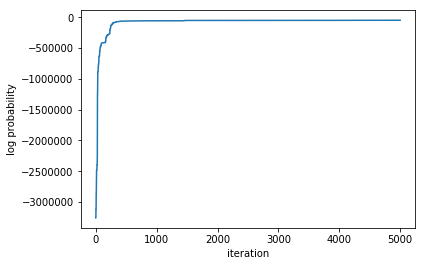

In [55]:
plt.plot(log_probs)
plt.xlabel('iteration')
plt.ylabel('log probability')

Text(0, 0.5, 'log probability')

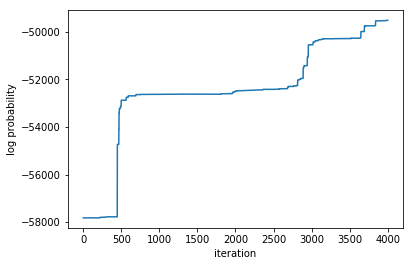

In [56]:
plt.plot(log_probs[1000:])
plt.xlabel('iteration')
plt.ylabel('log probability')

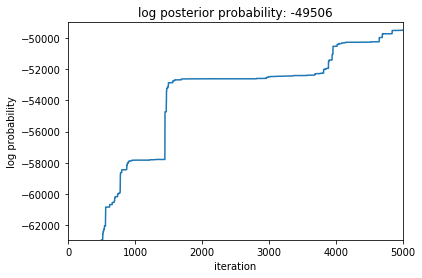

In [117]:
def plot_log_prob(t=1000):
    
    plt.xlim(0, len(log_probs))
    
    #min_t = max(0,t - 500)
    plt.ylim(log_probs[500], max(log_probs) + np.abs(max(log_probs) * 0.01))
    plt.plot(log_probs[:t])
    plt.xlabel('iteration')
    plt.ylabel('log probability')
    
    plt.title('log posterior probability: {}'.format(int(log_probs[t])))
plot_log_prob(t=5000)

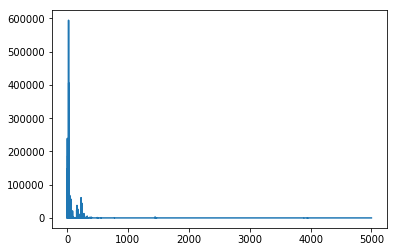

In [118]:
plt.plot(np.diff(log_probs))

In [120]:
np.sum(np.diff(log_probs)<0)

432

In [58]:
tree = traj[0]

Text(0.5, 0, 'iteration')

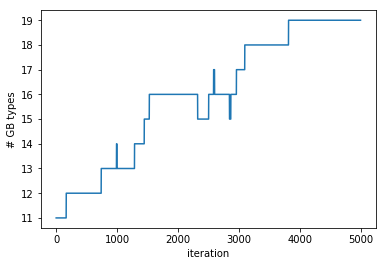

In [59]:
n_types = [tree.number_of_nodes for tree in traj]
plt.plot(n_types)
plt.yticks(list(range(min(n_types), max(n_types) + 1)))
plt.ylabel('# GB types')
plt.xlabel('iteration')

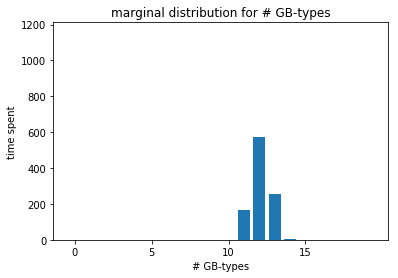

In [60]:
import numpy as np


def plot_running_average_model_evidence(t=1000):
    x = list(range(0, max(n_types) + 1))
    y = np.bincount(n_types[:t], minlength=len(x))
    
    plt.bar(x, y)
    plt.xlabel('# GB-types')
    plt.ylabel('time spent')
    plt.title('marginal distribution for # GB-types')
    
    plt.xticks(list(range(max(n_types) + 1))[::5])
    
    plt.ylim(0,max(np.bincount(n_types)))
plot_running_average_model_evidence()

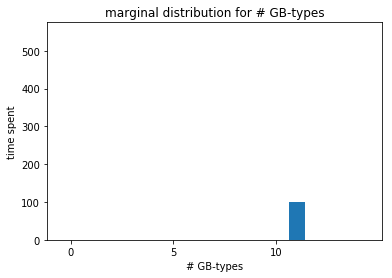

In [12]:
plot_running_average_model_evidence(100)

In [61]:
tree = traj[-1]

In [62]:
from simtk import unit

radii = np.array([tree.get_radius(n) / unit.nanometer for n in tree.ordered_nodes])

In [63]:
list(zip(tree.ordered_nodes, radii))

[('*', 0.10089335862785814),
 ('[#1]', 0.1364942257077213),
 ('[#6]', 0.21174462817033707),
 ('[#7]', 0.13681211879810293),
 ('[#8]', 0.12340660324594234),
 ('[#9]', 0.17073782911540605),
 ('[#15]', 0.07093841320001645),
 ('[#16]', 0.18649057850403986),
 ('[#17]', 0.03492235134348588),
 ('[#35]', 0.1720951042127554),
 ('[#53]', 0.19709876471468898),
 ('[#7]~[#6]', 0.1988878049948483),
 ('[#7]~[#16]', 0.09025283286041766),
 ('[#16]~[#17]', 0.20587898540575061),
 ('[#16]~[#1]', 0.19715427659500676),
 ('[#7]~[#6]~[#8]', 0.1900095405673747),
 ('[#7]~[#6]~[#17]', 0.2445036551807318),
 ('[#7]~[#6]~[#16]', 0.07059794477698327),
 ('[#7]~[#6]~[#8]~[#6]', 0.1337403979640545)]

In [64]:
# to assign colors, let's get all of the types every encountered during the simulation
# then put them in lexicographic order, then make a dictionary that indexes into a nice seaborn color palette

In [65]:
all_types = set()
for tree in traj:
    all_types.update(tree.ordered_nodes)
all_types = sorted(list(all_types))

In [66]:
all_types

['*',
 '[#15]',
 '[#15]~[#6]',
 '[#16]',
 '[#16]~[#16]',
 '[#16]~[#17]',
 '[#16]~[#1]',
 '[#17]',
 '[#1]',
 '[#35]',
 '[#53]',
 '[#6]',
 '[#6]~[#15]',
 '[#7]',
 '[#7]~[#16]',
 '[#7]~[#6]',
 '[#7]~[#6]~[#16]',
 '[#7]~[#6]~[#17]',
 '[#7]~[#6]~[#8]',
 '[#7]~[#6]~[#8]~[#6]',
 '[#8]',
 '[#9]']

In [67]:
len(all_types)

22

In [68]:
import seaborn.apionly as sns
color_list = sns.color_palette(palette="husl", n_colors=len(all_types))
color_list = color_list[5:] + color_list[:5]
color_dict = dict(zip(all_types, color_list))

In [69]:
# for scatter plot representation
x = []
y = []
c = []

for i in range(len(traj)):
    tree = traj[i]
    radii = [tree.get_radius(n) / unit.nanometer for n in tree.ordered_nodes]
    
    x += [i] * len(radii)
    y += radii
    c += [color_dict[t] for t in tree.ordered_nodes]

In [70]:
# for line-plot representation
x = np.arange(len(traj))
ys = [np.zeros(len(traj)) * np.nan for _ in all_types]
c = [color_dict[t] for t in all_types]

type_dict = dict(zip(all_types, range(len(all_types))))

for time, tree in enumerate(traj):
    for n in tree.ordered_nodes:
        i = type_dict[n]
        ys[i][time] = tree.get_radius(n) / unit.nanometer

In [71]:
print(traj[0])
print(traj[-1])

parent --> child
	* --> [#1]
	* --> [#6]
	* --> [#7]
	* --> [#8]
	* --> [#9]
	* --> [#15]
	* --> [#16]
	* --> [#17]
	* --> [#35]
	* --> [#53]

parent --> child
	* --> [#1]
	* --> [#6]
	* --> [#7]
	* --> [#8]
	* --> [#9]
	* --> [#15]
	* --> [#16]
	* --> [#17]
	* --> [#35]
	* --> [#53]
	[#7] --> [#7]~[#6]
	[#7] --> [#7]~[#16]
	[#16] --> [#16]~[#17]
	[#16] --> [#16]~[#1]
	[#7]~[#6] --> [#7]~[#6]~[#8]
	[#7]~[#6] --> [#7]~[#6]~[#17]
	[#7]~[#6] --> [#7]~[#6]~[#16]
	[#7]~[#6]~[#8] --> [#7]~[#6]~[#8]~[#6]



In [72]:
ys[0] - ys[1]

array([0.        , 0.        , 0.        , ..., 0.02995495, 0.02995495,
       0.02995495])

In [73]:
tree.ordered_nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]',
 '[#7]~[#6]',
 '[#7]~[#16]',
 '[#16]~[#17]',
 '[#16]~[#1]',
 '[#7]~[#6]~[#8]',
 '[#7]~[#6]~[#17]',
 '[#7]~[#6]~[#16]',
 '[#7]~[#6]~[#8]~[#6]']

In [74]:
tree.get_radius('*'), tree.get_radius('[#1]')

(Quantity(value=0.10089335862785814, unit=nanometer),
 Quantity(value=0.1364942257077213, unit=nanometer))

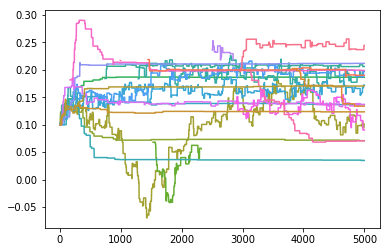

In [75]:
for i in range(len(all_types)):
    plt.plot(x, ys[i], c=c[i])

In [121]:
for y, n in zip(ys, all_types):
    if np.min(y) < 0:
        print(n)

*


/Users/joshuafass/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [125]:
[(n, np.min(np.nan_to_num(y))) for (n, y) in zip(all_types, ys)]

[('*', -0.06981580957179315),
 ('[#15]', 0.07093841320001645),
 ('[#15]~[#6]', -0.04196704531389079),
 ('[#16]', 0.1),
 ('[#16]~[#16]', 0.0),
 ('[#16]~[#17]', 0.0),
 ('[#16]~[#1]', 0.0),
 ('[#17]', 0.03492235134348588),
 ('[#1]', 0.1),
 ('[#35]', 0.1),
 ('[#53]', 0.1),
 ('[#6]', 0.1),
 ('[#6]~[#15]', 0.0),
 ('[#7]', 0.1),
 ('[#7]~[#16]', 0.0),
 ('[#7]~[#6]', 0.0),
 ('[#7]~[#6]~[#16]', 0.0),
 ('[#7]~[#6]~[#17]', 0.0),
 ('[#7]~[#6]~[#8]', 0.0),
 ('[#7]~[#6]~[#8]~[#6]', 0.0),
 ('[#8]', 0.1),
 ('[#9]', 0.1)]

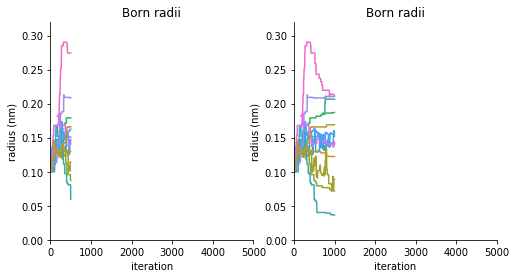

In [76]:
def plot_radii_as_scatter(ax, up_to_iteration=1000):
    
    t = np.argmax(np.array(x) >= up_to_iteration)
    
    ax.scatter(x[:t], y[:t], s=1, color=c[:t])
    ax.set_xlim(0, len(traj))
    ax.set_ylim(0, max(y) * 1.1)
    ax.set_xlabel('iteration')
    ax.set_ylabel('radius (nm)')
    
    ax.set_title('Born radii')
    
def plot_radii(ax, up_to_iteration=1000):
    
    for i in range(len(all_types)):
        ax.plot(x[:up_to_iteration], ys[i][:up_to_iteration], c=c[i])
    ax.set_xlim(0, len(traj))
    ax.set_ylim(0, max(y) * 1.1)
    ax.set_xlabel('iteration')
    ax.set_ylabel('radius (nm)')
    
    ax.set_title('Born radii')

def prettify_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plot_radii(ax, 500)
prettify_axes(ax)

ax = plt.subplot(1,2,2)
plot_radii(ax)
prettify_axes(ax)

In [77]:
node_color = [color_dict[n] for n in tree.G.nodes()]
import networkx as nx

In [78]:
layouts = [
    ('shell', nx.layout.shell_layout(tree.G)),
    ('fruchterman_reingold', nx.layout.fruchterman_reingold_layout(tree.G)),
    ('kamada_kawai', nx.layout.kamada_kawai_layout(tree.G)),
    ('spectral', nx.layout.spectral_layout(tree.G)),
    ('circular', nx.layout.circular_layout(tree.G)),
]

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


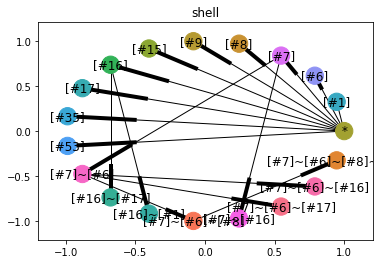

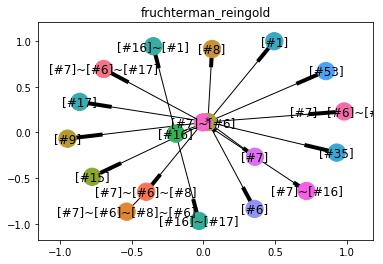

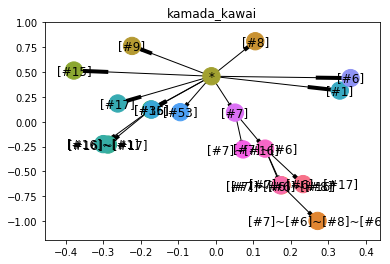

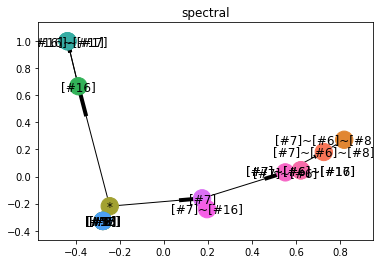

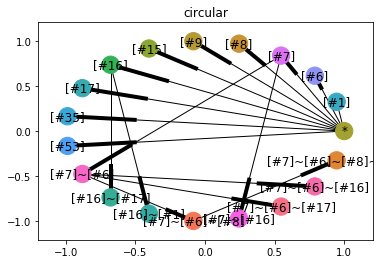

In [79]:
for name, pos in layouts:
    plt.figure()
    plt.title(name)
    nx.draw_networkx(tree.G, pos=pos, node_color=node_color, )

In [80]:
# none of these are what I want!

In [81]:
# let's just precompute sensible positions for all of the types

In [82]:
def depth(node):
    if node == '*':
        return 0
    return len(node.split('~'))

In [83]:
depth_dict = dict(zip(all_types, map(depth, all_types)))

In [84]:
depth_dict

{'*': 0,
 '[#15]': 1,
 '[#15]~[#6]': 2,
 '[#16]': 1,
 '[#16]~[#16]': 2,
 '[#16]~[#17]': 2,
 '[#16]~[#1]': 2,
 '[#17]': 1,
 '[#1]': 1,
 '[#35]': 1,
 '[#53]': 1,
 '[#6]': 1,
 '[#6]~[#15]': 2,
 '[#7]': 1,
 '[#7]~[#16]': 2,
 '[#7]~[#6]': 2,
 '[#7]~[#6]~[#16]': 3,
 '[#7]~[#6]~[#17]': 3,
 '[#7]~[#6]~[#8]': 3,
 '[#7]~[#6]~[#8]~[#6]': 4,
 '[#8]': 1,
 '[#9]': 1}

In [85]:
height_dict = dict(zip(all_types, 0.3 * np.arange(len(all_types))))
height_dict

{'*': 0.0,
 '[#15]': 0.3,
 '[#15]~[#6]': 0.6,
 '[#16]': 0.8999999999999999,
 '[#16]~[#16]': 1.2,
 '[#16]~[#17]': 1.5,
 '[#16]~[#1]': 1.7999999999999998,
 '[#17]': 2.1,
 '[#1]': 2.4,
 '[#35]': 2.6999999999999997,
 '[#53]': 3.0,
 '[#6]': 3.3,
 '[#6]~[#15]': 3.5999999999999996,
 '[#7]': 3.9,
 '[#7]~[#16]': 4.2,
 '[#7]~[#6]': 4.5,
 '[#7]~[#6]~[#16]': 4.8,
 '[#7]~[#6]~[#17]': 5.1,
 '[#7]~[#6]~[#8]': 5.3999999999999995,
 '[#7]~[#6]~[#8]~[#6]': 5.7,
 '[#8]': 6.0,
 '[#9]': 6.3}

In [96]:
max(height_dict.values())

6.3

In [86]:
pos_dict = dict(zip(all_types, [(depth_dict[t], height_dict[t]) for t in all_types]))
pos_dict

{'*': (0, 0.0),
 '[#15]': (1, 0.3),
 '[#15]~[#6]': (2, 0.6),
 '[#16]': (1, 0.8999999999999999),
 '[#16]~[#16]': (2, 1.2),
 '[#16]~[#17]': (2, 1.5),
 '[#16]~[#1]': (2, 1.7999999999999998),
 '[#17]': (1, 2.1),
 '[#1]': (1, 2.4),
 '[#35]': (1, 2.6999999999999997),
 '[#53]': (1, 3.0),
 '[#6]': (1, 3.3),
 '[#6]~[#15]': (2, 3.5999999999999996),
 '[#7]': (1, 3.9),
 '[#7]~[#16]': (2, 4.2),
 '[#7]~[#6]': (2, 4.5),
 '[#7]~[#6]~[#16]': (3, 4.8),
 '[#7]~[#6]~[#17]': (3, 5.1),
 '[#7]~[#6]~[#8]': (3, 5.3999999999999995),
 '[#7]~[#6]~[#8]~[#6]': (4, 5.7),
 '[#8]': (1, 6.0),
 '[#9]': (1, 6.3)}

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


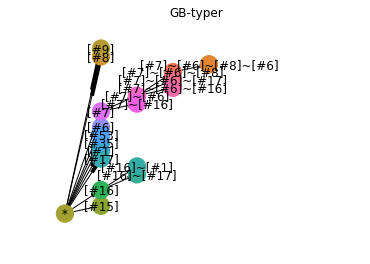

In [97]:
def draw_typing_tree(tree):
    node_color = [color_dict[n] for n in tree.G.nodes()]
    nx.draw_networkx(tree.G, pos=pos_dict, node_color=node_color)
    plt.xlim(-1,max(height_dict.values()) + 2)
    plt.ylim(-1,max(height_dict.values()) + 1)
    #plt.xticks([])
    #plt.yticks([])
    plt.axis('off')
    plt.title('GB-typer')
draw_typing_tree(traj[-1])

In [98]:
def plot_summary(t=1000):
    plt.figure(figsize=(8,8))
    
    # 1. current tree
    ax = plt.subplot(2,2,1)
    tree = traj[t]
    draw_typing_tree(tree)
    
    # 2. radii
    ax = plt.subplot(2,2,2)
    plot_radii(ax, t)
    prettify_axes(ax)

    # 3. log probability
    ax = plt.subplot(2,2,3)
    plot_log_prob(t)
    prettify_axes(ax)
    
    
    # 4. marginal # GB types
    ax = plt.subplot(2,2,4)
    plot_running_average_model_evidence(t)
    prettify_axes(ax)
    
    # (# types trajectory?)
    
    plt.tight_layout()

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


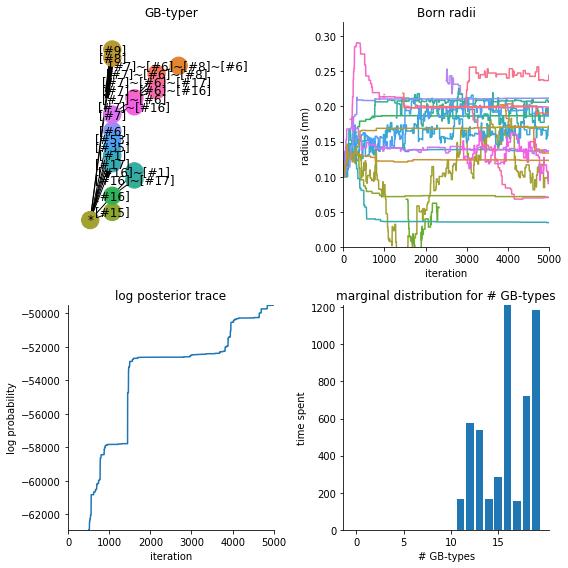

In [101]:
plot_summary(len(traj) - 1)

In [102]:
len(traj)

5001

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


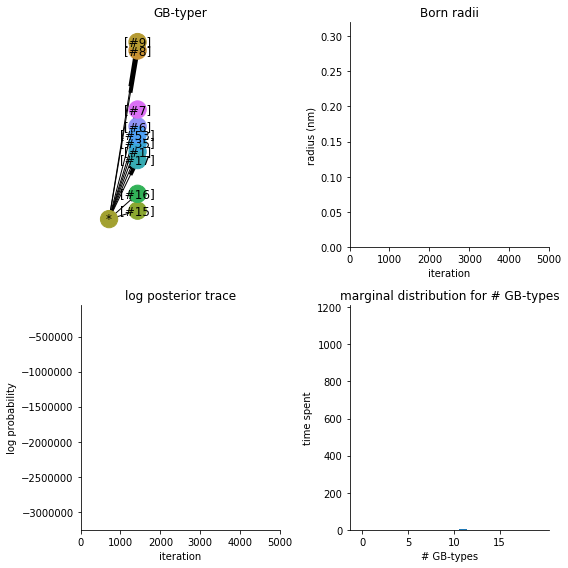

In [93]:
plot_summary(2)

In [103]:
from tqdm import tqdm
for t in tqdm(range(2, len(traj))[::50]):
    plot_summary(t)
    plt.savefig('longer_bugfixed_typing_animation/{:03}.png'.format(t))
    plt.close()

  0%|          | 0/100 [00:00<?, ?it/s]/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


Add subplots for "train" / "test" solvation free energy predictions?

In [45]:
import mdtraj as md
import numpy as np
from pkg_resources import resource_filename
from tqdm import tqdm

from bayes_implicit_solvent.posterior_sampling import Molecule
from bayes_implicit_solvent.smarts import atomic_number_dict
from bayes_implicit_solvent.solvation_free_energy import smiles_list
from bayes_implicit_solvent.typers import GBTypingTree
from bayes_implicit_solvent.utils import mdtraj_to_list_of_unitted_snapshots

data_path = '../data/'

np.random.seed(0)
train_mols = []

N_train = 64

smiles_subset = list(smiles_list)
np.random.shuffle(smiles_subset)
train_smiles_subset = smiles_subset[:N_train]
print('looking at only {} entries from FreeSolv'.format(len(train_smiles_subset)))
n_configuration_samples = 10

for smiles in train_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    train_mols.append(mol)

looking at only 64 entries from FreeSolv


In [46]:
test_smiles_subset = smiles_subset[N_train:]
test_mols = []
for smiles in test_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    test_mols.append(mol)

In [48]:
experiment_train = [mol.experimental_value for mol in train_mols]
experiment_unc_train = [mol.experimental_uncertainty for mol in train_mols]

In [49]:
def get_train_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in train_mols]
def get_test_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in test_mols]

In [ ]:
train_predictions = []
for t in tqdm(range(2, len(traj))[::10]):
    tree = traj[t]
    train_predictions.append(get_train_predictions(tree))

In [ ]:
test_predictions = []
for t in tqdm(range(2, len(traj))[::10]):
    tree = traj[t]
    test_predictions.append(get_test_predictions(tree))

In [ ]:
y_ = [[p[0] for p in pred] for pred in train_predictions]
y_unc = [[p[1] for p in pred] for pred in train_predictions]

In [ ]:
plt.errorbar(x=experiment_train, xerr=experiment_unc_train, y=y_[-1], yerr=y_unc[-1], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
plt.errorbar(x=experiment, xerr=experiment_unc, y=y_[-1], yerr=y_unc[-1], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

plt.ylim(min(experiment), max(experiment))
plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
plt.errorbar(x=experiment, xerr=experiment_unc, y=y_[0], yerr=y_unc[0], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

#plt.ylim(min(experiment), max(experiment))
plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
for pred in predictions[::10]:
    plt.figure()
    plt.scatter(experiment, pred)